In [1]:
import numpy as np
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy

### Segmentation

**(Recap from chapter 2)**

In audio processing operations are performed frame-wise, typically between 10 to 100 ms. <br/>
A frame is defined by it's constant size and hop size.

In [2]:
T = 3.0      # duration in seconds
sr = 22050   # sampling rate in Hertz
amplitude = np.logspace(-3, 0, int(T*sr), endpoint=False, base=10.0) # time-varying amplitude
print(amplitude.min(), amplitude.max()) # starts at 110 Hz, ends at 880 Hz

0.001 0.9998955798243658


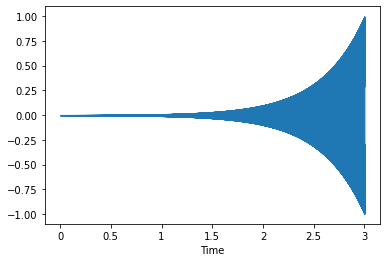

In [3]:
f0 = 400
t = np.linspace(0, T, int(T*sr), endpoint=False)
x = amplitude*np.sin(2*np.pi*f0*t)

librosa.display.waveshow(x, sr=sr)

In [17]:
frame_length = 1024//4
hop_length = 512//4

# Calculate the root mean square
def rms(signal, frame_size, hop_length):
    """Calculate the amplitude envelope of a signal with a given frame size nad hop length."""
    rms = []
    # calculate rms for each frame
    for i in range(0, len(signal), hop_length): 
        rms_current_frame = np.sqrt(np.mean(signal[i:i+frame_size]**2)) 
        rms.append(rms_current_frame)
    
    return np.array(rms)

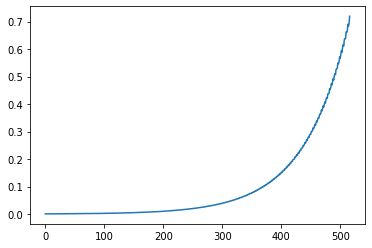

In [18]:
signal_rms = rms(x, frame_length, hop_length)
#plt.semilogy(signal_rms)
plt.plot(signal_rms)

librosa offers the functionality of producing a list of uniformly sized frames.

In [19]:
frames = librosa.util.frame(x, frame_length=frame_length, hop_length=hop_length)
print('Signal with length {} has {} frames of {} samples'.format(len(x), frames.shape[1], frames.shape[0]))

Signal with length 66150 has 515 frames of 256 samples


### Fourier Transform

In [20]:
def plot_fourier_transform(signal, time):
   
    X = [x.real for x in signal]
    Y = [x.imag for x in signal]

    plt.figure(figsize=(15, 10))
    plt.plot(X, Y, 'o')

    
    # set origin axes
    ax = plt.gca()
    ax.grid(True)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')


    plt.xlim(-3, 3)
    plt.ylim(-3, 3)

    plt.show()



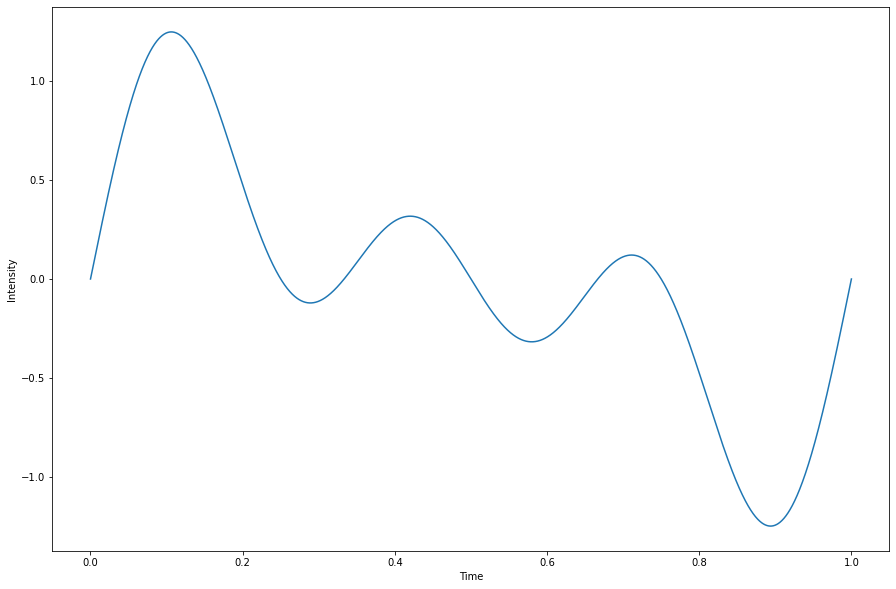

In [29]:
f0 = 1
f = 1
t = np.linspace(0, 1, 10000)
signal = np.sin(2*np.pi*(f0*t))  + np.sin(2*np.pi*(2*f0*t)) #+ np.sin(2*np.pi*(3*f0*t))
angle = -2 * np.pi * f * t
pure_tone = np.cos(angle) + 1j * np.sin(angle)
complex_signal = pure_tone * signal

plt.figure(figsize=(15, 10))
plt.plot(t, np.real(complex_signal))
plt.xlabel("Time")
plt.ylabel("Intensity")
plt.show()


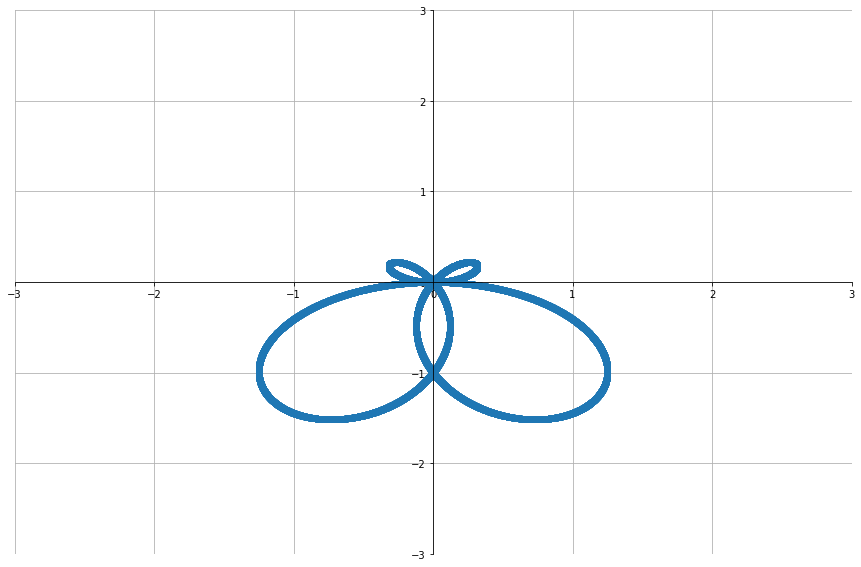

In [30]:
plot_fourier_transform(complex_signal, time=t)